In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_path = "data/raw/processed_images"

# Dimensions standardisées
img_height, img_width = 128, 128
batch_size = 32

# Générateurs d'images avec normalisation
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    directory=f"{dataset_path}/train",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    directory=f"{dataset_path}/test",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)


Found 491 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


In [2]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # binaire
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

c:\Users\hiron\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,699,009 (6.48 MB)

 Trainable params: 1,699,009 (6.48 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
import mlflow.keras, time
from tensorflow.keras.callbacks import TensorBoard

# set mlflow experiment
mlflow.set_experiment("cataract_classification")

# create a tensorboard callback
log_dir = f"logs/cnn_{int(time.time())}"
tensorboard_callback = TensorBoard(log_dir=log_dir)

with mlflow.start_run(run_name="CNN_Model_basic"):
    mlflow.keras.autolog()

    history = model.fit(
        train_generator,
        epochs=15,
        validation_data=test_generator,
        callbacks=[tensorboard_callback]
    )

    model.save("cataract_basic_classifier.h5")

2025/04/24 10:00:33 WARNING mlflow.keras.autologging: Unrecognized dataset type <class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.
2025/04/24 10:00:33 WARNING mlflow.keras.autologging: Unrecognized dataset type <class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.


Epoch 1/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 922ms/step - accuracy: 0.9068 - loss: 0.1815 - val_accuracy: 0.9339 - val_loss: 0.1683
Epoch 2/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 882ms/step - accuracy: 0.9216 - loss: 0.1925 - val_accuracy: 0.9008 - val_loss: 0.1942
Epoch 3/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 842ms/step - accuracy: 0.8845 - loss: 0.2311 - val_accuracy: 0.9339 - val_loss: 0.1827
Epoch 4/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 845ms/step - accuracy: 0.9282 - loss: 0.2129 - val_accuracy: 0.8843 - val_loss: 0.2931
Epoch 5/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 835ms/step - accuracy: 0.9096 - loss: 0.2432 - val_accuracy: 0.7769 - val_loss: 0.4526
Epoch 6/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 901ms/step - accuracy: 0.8620 - loss: 0.3328 - val_accuracy: 0.8760 - val_loss: 0.2470
Epoch 7/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 844ms/step - accuracy: 0.9037 - loss: 0.2202 - val_accuracy: 0.9339 - val_loss: 0.2103
Epoch 8/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 875ms/step - accuracy: 0.9319 - loss: 0.1982 - val_accu

In [11]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 426ms/step - accuracy: 0.9274 - loss: 0.1201
Test Accuracy: 0.92


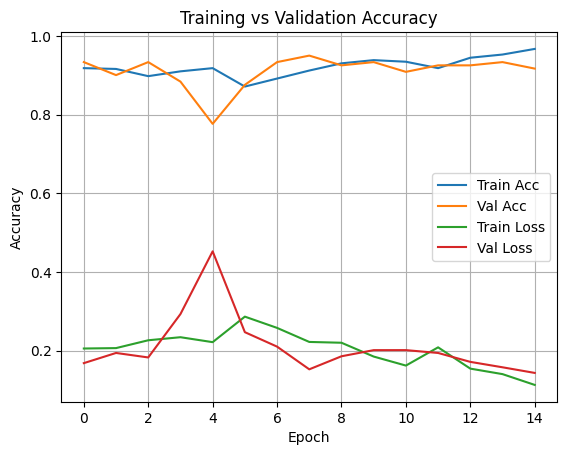

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.grid(True)
plt.show()

ADDING DATA AUGMENTATION & DROPOUT

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Train set avec augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Test set juste normalisé
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    directory=f"{dataset_path}/train",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    directory=f"{dataset_path}/test",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# model with dropout
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),  # dropout here
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Found 491 images belonging to 2 classes.


Found 121 images belonging to 2 classes.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,699,009 (6.48 MB)

 Trainable params: 1,699,009 (6.48 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
with mlflow.start_run(run_name="CNN_Model_with_dropout"):
    mlflow.keras.autolog()

    history = model.fit(
        train_generator,
        epochs=15,
        validation_data=test_generator,
        callbacks=[tensorboard_callback]
    )

    model.save("cataract_classifier_with_dropout.h5")

loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy:.2f}")

2025/04/24 10:04:37 WARNING mlflow.keras.autologging: Unrecognized dataset type <class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.
2025/04/24 10:04:37 WARNING mlflow.keras.autologging: Unrecognized dataset type <class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.


Epoch 1/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 918ms/step - accuracy: 0.4700 - loss: 0.7932 - val_accuracy: 0.6860 - val_loss: 0.6810
Epoch 2/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 870ms/step - accuracy: 0.6923 - loss: 0.6449 - val_accuracy: 0.8099 - val_loss: 0.4197
Epoch 3/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 877ms/step - accuracy: 0.7785 - loss: 0.4669 - val_accuracy: 0.8512 - val_loss: 0.3762
Epoch 4/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 858ms/step - accuracy: 0.8052 - loss: 0.4071 - val_accuracy: 0.8264 - val_loss: 0.4220
Epoch 5/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 905ms/step - accuracy: 0.8126 - loss: 0.3906 - val_accuracy: 0.8430 - val_loss: 0.3819
Epoch 6/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 863ms/step - accuracy: 0.7726 - loss: 0.4393 - val_accuracy: 0.8512 - val_loss: 0.3527
Epoch 7/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 865ms/step - accuracy: 0.8098 - loss: 0.4074 - val_accuracy: 0.8182 - val_loss: 0.3786
Epoch 8/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 861ms/step - accuracy: 0.8430 - loss: 0.3756 - val_accu

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 429ms/step - accuracy: 0.8641 - loss: 0.3739
Test Accuracy: 0.88


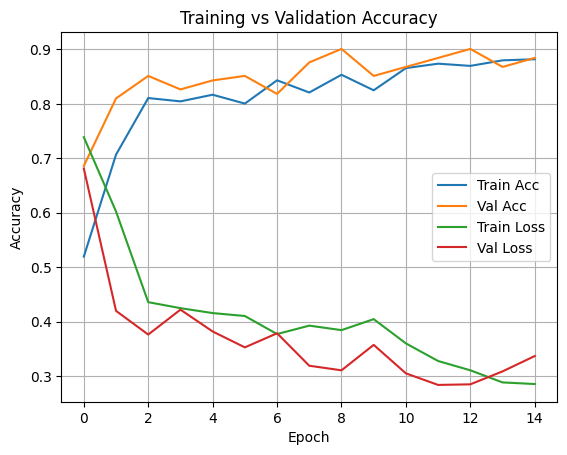

In [15]:

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.grid(True)
plt.show()

MORE EPOCH + EARLY STOPPING

2025/04/24 09:54:53 WARNING mlflow.keras.autologging: Unrecognized dataset type <class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.
2025/04/24 09:54:53 WARNING mlflow.keras.autologging: Unrecognized dataset type <class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.


Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 688ms/step - accuracy: 0.8737 - loss: 0.3111

16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 933ms/step - accuracy: 0.8728 - loss: 0.3136 - val_accuracy: 0.8926 - val_loss: 0.3329
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 683ms/step - accuracy: 0.8825 - loss: 0.3490

16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 838ms/step - accuracy: 0.8813 - loss: 0.3502 - val_accuracy: 0.8678 - val_loss: 0.3118
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 828ms/step - accuracy: 0.8400 - loss: 0.3276 - val_accuracy: 0.8678 - val_loss: 0.3704
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 752ms/step - accuracy: 0.8501 - loss: 0.3600

16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 908ms/step - accuracy: 0.8504 - loss: 0.3590 - val_accuracy: 0.9091 - val_loss: 0.2907
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 724ms/step - accuracy: 0.8690 - loss: 0.2903

16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 883ms/step - accuracy: 0.8700 - loss: 0.2905 - val_accuracy: 0.9008 - val_loss: 0.2688
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 876ms/step - accuracy: 0.8667 - loss: 0.2809 - val_accuracy: 0.8182 - val_loss: 0.3982
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 875ms/step - accuracy: 0.8618 - loss: 0.3318 - val_accuracy: 0.8843 - val_loss: 0.3124
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 888ms/step - accuracy: 0.8862 - loss: 0.2881 - val_accuracy: 0.9008 - val_loss: 0.2838
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 695ms/step - accuracy: 0.9098 - loss: 0.2323

16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 861ms/step - accuracy: 0.9088 - loss: 0.2338 - val_accuracy: 0.8843 - val_loss: 0.2521
Epoch 10/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 706ms/step - accuracy: 0.9114 - loss: 0.2412

16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 860ms/step - accuracy: 0.9110 - loss: 0.2423 - val_accuracy: 0.8926 - val_loss: 0.2311
Epoch 11/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 702ms/step - accuracy: 0.9054 - loss: 0.2142

16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 867ms/step - accuracy: 0.9054 - loss: 0.2160 - val_accuracy: 0.9174 - val_loss: 0.2193
Epoch 12/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 829ms/step - accuracy: 0.8993 - loss: 0.2660 - val_accuracy: 0.9091 - val_loss: 0.2556
Epoch 13/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 725ms/step - accuracy: 0.9117 - loss: 0.2548

16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 890ms/step - accuracy: 0.9114 - loss: 0.2540 - val_accuracy: 0.9339 - val_loss: 0.1915
Epoch 14/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 856ms/step - accuracy: 0.8917 - loss: 0.2800 - val_accuracy: 0.9256 - val_loss: 0.2306
Epoch 15/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 666ms/step - accuracy: 0.9102 - loss: 0.2107

16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 836ms/step - accuracy: 0.9106 - loss: 0.2103 - val_accuracy: 0.9504 - val_loss: 0.1863
Epoch 16/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 681ms/step - accuracy: 0.9097 - loss: 0.2196

16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 839ms/step - accuracy: 0.9099 - loss: 0.2191 - val_accuracy: 0.9256 - val_loss: 0.1854
Epoch 17/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 687ms/step - accuracy: 0.9247 - loss: 0.1816

16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 843ms/step - accuracy: 0.9246 - loss: 0.1822 - val_accuracy: 0.9174 - val_loss: 0.1774
Epoch 18/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 893ms/step - accuracy: 0.9168 - loss: 0.1844 - val_accuracy: 0.9091 - val_loss: 0.2234
Epoch 19/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 857ms/step - accuracy: 0.8897 - loss: 0.2374 - val_accuracy: 0.8926 - val_loss: 0.2218
Epoch 20/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 907ms/step - accuracy: 0.9272 - loss: 0.2113 - val_accuracy: 0.9174 - val_loss: 0.2086
Epoch 21/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 895ms/step - accuracy: 0.9416 - loss: 0.1786 - val_accuracy: 0.9339 - val_loss: 0.1920
Epoch 22/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 904ms/step - accuracy: 0.9295 - loss: 0.1716 - val_accuracy: 0.9008 - val_loss: 0.1956


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 425ms/step - accuracy: 0.9242 - loss: 0.1607
Test Accuracy: 0.92


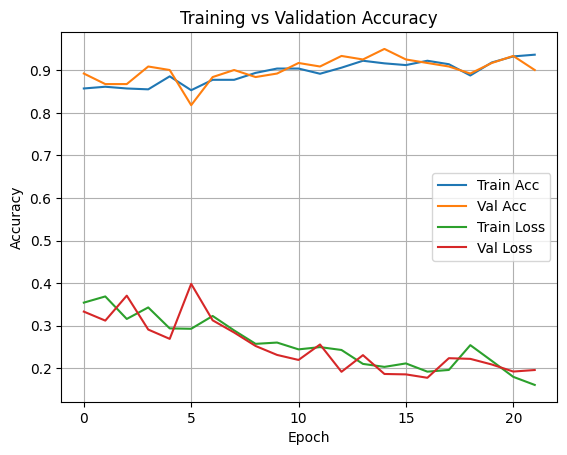

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_cnn_model.h5', save_best_only=True, monitor='val_loss'),
    tensorboard_callback
]

with mlflow.start_run(run_name="CNN_Model_With_dropout_and_early_stop"):
    mlflow.keras.autolog()

    history = model.fit(
        train_generator,
        epochs=30,
        validation_data=test_generator,
        callbacks=callbacks
    )

    model.save("cataract_classifier_with_dropout_and_early_stop.h5")

loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy:.2f}")

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.grid(True)
plt.show()